# Train transaction classifier
This uses "`MerchantCategories.manual.csv`" previous step, and constructs a classifier which when given a merchant & suburb description, classifies it into one of the categories

## All python imports and globals

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


DATASET_FILE='../data/MerchantCategories.manual.csv'

COL_NAME_MERCHANT='Merchant'
COL_NAME_SUBURB='Suburb'
COL_NAME_GCAT0='GCat0'

## Read dataset and vectorize
Load the CSV, and encode the String labels for category (output) to number

In [2]:
rawdf = pd.read_csv(DATASET_FILE)
cat0Encoder = preprocessing.LabelEncoder()
rawdf['EncodedCategoryLabels'] = cat0Encoder.fit_transform(rawdf[COL_NAME_GCAT0])
print "Labels: ", cat0Encoder.classes_
rawdf


Labels:  ['atm' 'bakery' 'bank' 'bar' 'bicycle_store' 'cafe' 'car_dealer'
 'car_rental' 'car_wash' 'clothing_store' 'convenience_store'
 'department_store' 'electronics_store' 'entertainment' 'fee' 'food'
 'furniture_store' 'gas_station' 'grocery_or_supermarket' 'gym'
 'hardware_store' 'home_goods_store' 'internet/phone' 'laundry'
 'local_government_office' 'lodging' 'meal_takeaway' 'movie_rental'
 'moving_company' 'parking' 'pharmacy' 'post_office' 'public_transit'
 'rent' 'restaurant' 'shopping_mall' 'storage' 'store' 'taxi' 'transfer'
 'travel_agency' 'utility']


,Merchant,Suburb,GPlace_Name,GPlace_Id,GAddr,GCat0,GCat1,GCat2,EncodedCategoryLabels
0,DIRECT DEBIT 142619 TPG INTERNET DH9Q0HB22EP03...,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,internet/phone,UNCATEGORIZED,UNCATEGORIZED,22
1,LUO SONG CHICKEN QPS PEAKHURST AUS,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,restaurant,UNCATEGORIZED,UNCATEGORIZED,34
2,UBER TRIP WJAQC HELPU 14518236738 AU AUS,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,taxi,UNCATEGORIZED,UNCATEGORIZED,38
3,PHARMACY DEPOT HURSQPS,HURSTVILLE BC,UNKNOWN,UNKNOWN,UNKNOWN,pharmacy,UNCATEGORIZED,UNCATEGORIZED,30
4,TRANSFER TO OTHER BANK NETBANK RENT PRESIDENT AVE,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,transfer,UNCATEGORIZED,UNCATEGORIZED,39
5,DIRECT DEBIT 142619 TPG INTERNET DH9M1IFK4EH03...,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,internet/phone,UNCATEGORIZED,UNCATEGORIZED,22
6,WDL ATM CBA ATM WYNYARD A NSW 200901 AUS,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,atm,UNCATEGORIZED,UNCATEGORIZED,0
7,LONGO GROUP PTY LTD GYMEA AUS,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,cafe,UNCATEGORIZED,UNCATEGORIZED,5
8,TRANSPORT FOR NSW,SYDNEY,Lost Property Transport Sydney Trains,ChIJK9LH7iOuEmsRxJXGAVcr_s4,"484 Pitt Street, Haymarket",public_transit,NaN,NaN,32
9,DIRECT DEBIT 119218 VODAFONE T3D11E51E,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,internet/phone,UNCATEGORIZED,UNCATEGORIZED,22


## Vectorize Description column

In [3]:
vectorizer = CountVectorizer()
merchants = vectorizer.fit_transform(rawdf['Merchant']).todense()

print merchants

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 1]
 [0 0 0 ..., 0 0 0]]


## Split dataset into train and test


In [4]:
x_train, x_test, y_train, y_test = train_test_split(merchants,
                                                    rawdf['EncodedCategoryLabels'].as_matrix(),
                                                   test_size=0.1)

print "Sample split: \n", x_train[:10],"\n", y_train[:10]

Sample split: 
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]] 
[14 34 34 18 17  5 26 36 34 34]


### Build Classifier

In [5]:
#clf =  DecisionTreeClassifier(min_samples_leaf=4)
clf =  SVC(kernel='linear', C=1000, gamma=1)
fitted = clf.fit(x_train, y_train)
scores = cross_val_score(clf, x_train, y_train, cv=22)
print "Mean score: ", np.mean(scores), "\n", scores

print cat0Encoder.classes_[15]

Mean score:  0.539904049203 
[ 0.14634146  0.25        0.3125      0.28571429  0.33333333  0.5         0.5
  0.2         0.4         0.2         0.75        0.66666667  0.33333333
  1.          0.66666667  0.66666667  0.66666667  0.          1.          1.
  1.          1.        ]
food


/home/juicebox/anaconda/lib/python2.7/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=22.
  % (min_groups, self.n_splits)), Warning)


## Show confusion matrix

In [6]:
def displayConfusionMatrix(cmatrix):
    print cmatrix
    plt.matshow(cmatrix)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

[[0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 1 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 2 0 0 2 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]]


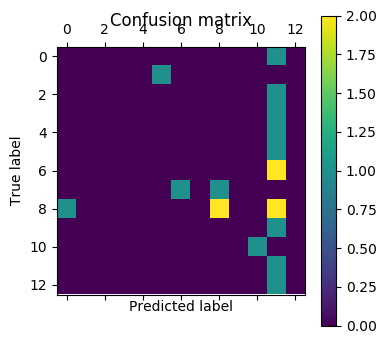

In [7]:
y_pred = clf.predict(x_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
displayConfusionMatrix(confusion_matrix)




The confusion matrix above shows that Bendigo and CBA can be accurately predicated (all true positives only), but ANZ can occassionally be classified incorrectly

### Trying out a few samples manually

In [9]:
testTexts = [
    "coles 12412",
    "woolworths haymarket",
    "harvin spices",
    "aldi sydney",
    "trip 3x of uber",
    "trip 3x of gogetcar",
    "paypal transaction",
    "nab bank atm penrith",
    "myrepublic  broadband ",
    "Pay TPG internet Sydney",
    "direct debit vodafone 1920",
            ]
vector = vectorizer.transform(testTexts).todense()
# print clf.predict_proba(vector)
print zip(testTexts,cat0Encoder.classes_[(clf.predict(vector))])

[('coles 12412', 'grocery_or_supermarket'), ('woolworths haymarket', 'grocery_or_supermarket'), ('harvin spices', 'grocery_or_supermarket'), ('aldi sydney', 'lodging'), ('trip 3x of uber', 'taxi'), ('trip 3x of gogetcar', 'restaurant'), ('paypal transaction', 'restaurant'), ('nab bank atm penrith', 'restaurant'), ('myrepublic  broadband ', 'internet/phone'), ('Pay TPG internet Sydney', 'internet/phone'), ('direct debit vodafone 1920', 'internet/phone')]


## Save (pickle) the necessary components to re-use the classifier
We will need to save both `vectorizer`, `cat0Encoder` and `clf`, since both will be required to classify unseen text, as seen in the example above, by using the same vectorizer to encode the input text to be fed into the classifier, and to interpret the output labels correctly